#  Task 1: Import and Load Data

In [214]:
import math
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [218]:
#from keras.models import Sequential
#from kreas.layers import Dense, LSTM

In [191]:
df = pd.read_csv(".\data_raw.csv")

In [192]:
df.head()

,week,sku,weekly_sales,feat_main_page,color,price,vendor,funct.numb,functionality
0,10/31/2016,1,135,True,black,10.16,6,6,Mobile phone accessories
1,11/7/2016,1,102,True,black,9.86,6,6,Mobile phone accessories
2,11/14/2016,1,110,True,black,10.24,6,6,Mobile phone accessories
3,11/21/2016,1,127,True,black,8.27,6,6,Mobile phone accessories
4,11/28/2016,1,84,True,black,8.83,6,6,Mobile phone accessories


### Data Overview

In [193]:
#Get number of rows and columns in Datashet
df.shape

(4400, 9)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   week            4400 non-null   object 
 1   sku             4400 non-null   int64  
 2   weekly_sales    4400 non-null   int64  
 3   feat_main_page  4400 non-null   bool   
 4   color           4390 non-null   object 
 5   price           4400 non-null   float64
 6   vendor          4400 non-null   int64  
 7   funct.numb      4400 non-null   int64  
 8   functionality   4400 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 279.4+ KB


In [195]:
df.index

RangeIndex(start=0, stop=4400, step=1)

In [196]:
df.describe(include="all")

,week,sku,weekly_sales,feat_main_page,color,price,vendor,funct.numb,functionality
count,4400,4400.000000,4400.000000,4400,4390,4400.000000,4400.000000,4400.000000,4400
unique,100,NaN,NaN,2,10,NaN,NaN,NaN,12
top,10/31/2016,NaN,NaN,False,black,NaN,NaN,NaN,Mobile phone accessories
freq,44,NaN,NaN,2825,1691,NaN,NaN,NaN,1100
mean,NaN,22.500000,83.054773,NaN,NaN,44.432709,6.909091,5.818182,NaN
std,NaN,12.699868,288.000205,NaN,NaN,42.500295,2.503175,3.084568,NaN
min,NaN,1.000000,0.000000,NaN,NaN,2.390000,1.000000,1.000000,NaN
25%,NaN,11.750000,11.000000,NaN,NaN,15.680000,6.000000,4.000000,NaN
50%,NaN,22.500000,25.000000,NaN,NaN,27.550000,6.500000,6.000000,NaN
75%,NaN,33.250000,70.000000,NaN,NaN,54.990000,9.000000,8.250000,NaN


# Task2: Cleaning Data
* Cleaning Empty Cells
* Remove Duplicate
* Cleaning wrong format
* Cleaning wrong data 

In [197]:
#CLEANING EMPTY CELLS
df.dropna(inplace = True)
print(df.to_string())

            week  sku  weekly_sales  feat_main_page   color   price  vendor  funct.numb                 functionality
0     10/31/2016    1           135            True   black   10.16       6           6      Mobile phone accessories
1      11/7/2016    1           102            True   black    9.86       6           6      Mobile phone accessories
2     11/14/2016    1           110            True   black   10.24       6           6      Mobile phone accessories
3     11/21/2016    1           127            True   black    8.27       6           6      Mobile phone accessories
4     11/28/2016    1            84            True   black    8.83       6           6      Mobile phone accessories
5      12/5/2016    1            87            True   black    8.98       6           6      Mobile phone accessories
6     12/12/2016    1            64            True   black   10.40       6           6      Mobile phone accessories
7     12/19/2016    1           128            True   bl

In [198]:
#REMOVE DUPLICATE
df.drop_duplicates(inplace = True)

In [199]:
# QUERY CODE THAT HAVE Weekly_sales == 0
df.loc[df.weekly_sales == 0]

,week,sku,weekly_sales,feat_main_page,color,price,vendor,funct.numb,functionality
2890,7/23/2018,29,0,False,grey,58.40,6,6,Mobile phone accessories
3175,4/9/2018,32,0,False,black,117.79,10,1,Streaming sticks
4293,8/13/2018,43,0,True,gold,162.99,9,11,Fitness trackers


In [200]:
#DROP WRONG DATA
for x in df.index:
    if df.loc[x,"weekly_sales"] == 0:
        df.drop(x,inplace = True)

In [201]:
df.describe(include="all")

,week,sku,weekly_sales,feat_main_page,color,price,vendor,funct.numb,functionality
count,4387,4387.000000,4387.000000,4387,4387,4387.000000,4387.000000,4387.000000,4387
unique,100,NaN,NaN,2,10,NaN,NaN,NaN,12
top,10/16/2017,NaN,NaN,False,black,NaN,NaN,NaN,Mobile phone accessories
freq,44,NaN,NaN,2819,1690,NaN,NaN,NaN,1099
mean,NaN,22.460223,83.246866,NaN,NaN,44.328443,6.905402,5.809437,NaN
std,NaN,12.679768,288.402636,NaN,NaN,42.448366,2.504157,3.081678,NaN
min,NaN,1.000000,1.000000,NaN,NaN,2.390000,1.000000,1.000000,NaN
25%,NaN,11.000000,11.000000,NaN,NaN,15.645000,6.000000,4.000000,NaN
50%,NaN,22.000000,26.000000,NaN,NaN,27.490000,6.000000,6.000000,NaN
75%,NaN,33.000000,70.000000,NaN,NaN,54.990000,9.000000,8.000000,NaN


# Task 3: Reporting

## Task 3.1: What was the best SKU for sales? How much was earned?

In [202]:
sale_value_by_sku = df.groupby('sku').sum()['weekly_sales']
#Top 5 SKU
sale_value_by_sku.sort_values(ascending = False).head(5)

sku
25    100839
30     36932
15     27766
33     15496
34     13756
Name: weekly_sales, dtype: int64

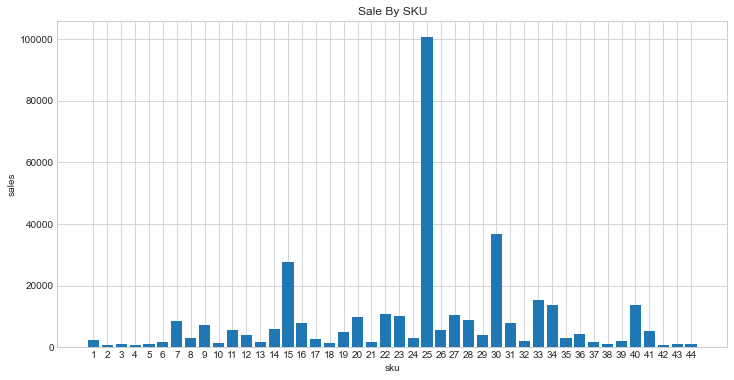

In [267]:
fig,ax = plt.subplots(figsize=(12,6))

plt.style.use('seaborn-whitegrid')

sku_numb = range(1, 45)
ax.bar(x=sku_numb, height=sale_value_by_sku)
ax.set(title="Sale By SKU", xlabel="sku",ylabel="sales", xticks= (sku_numb) );

## Task 3.2: What functionality have the best sales? 

In [204]:
sale_value_by_funct = df.groupby('functionality').sum()['weekly_sales']
sale_value_by_funct.sort_values(ascending = False).head(5)

functionality
Selfie sticks                   140062
Mobile phone accessories         99982
Portable smartphone chargers     39689
Smartphone stands                23516
Streaming sticks                 16660
Name: weekly_sales, dtype: int64

In [205]:
#functs = df["functionality"].unique()
functs = [functionality for functionality, weekly_sales in sale_value_by_funct.items()]

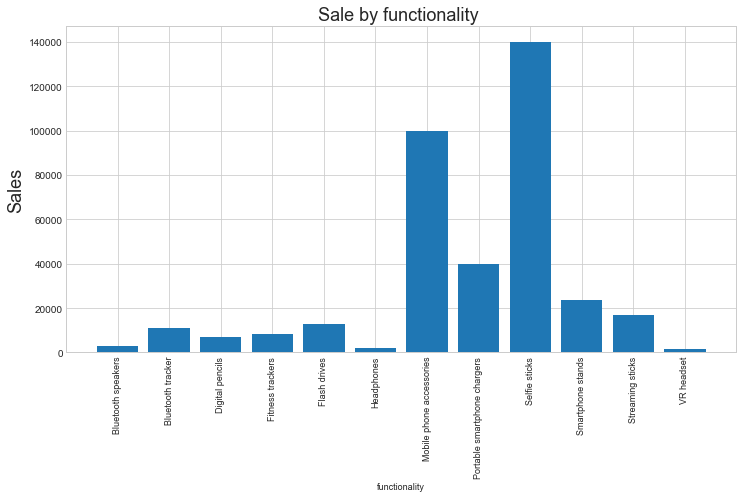

In [266]:
fig,ax = plt.subplots(figsize=(12,6))
plt.bar(x=functs, height=sale_value_by_funct);
plt.xticks(functs, rotation=90, size=9)
plt.xlabel('functionality', fontsize = 9)
plt.ylabel('Sales', fontsize = 18)
plt.title("Sale by functionality ", fontsize = 18);

In [207]:
#print(functionality)
#print(sale_value_by_funct)

## Task 3.3: When was the best-selling? Total Weekly Sales.

In [208]:
df["week"] = pd.to_datetime(df["week"])

In [209]:
sale_value_by_week = df.groupby('week').sum()['weekly_sales']
sale_value_by_week.sort_values(ascending = False).head(5)

week
2017-10-30    9548
2018-09-24    9111
2018-07-09    9065
2018-09-17    8524
2017-05-22    6893
Name: weekly_sales, dtype: int64

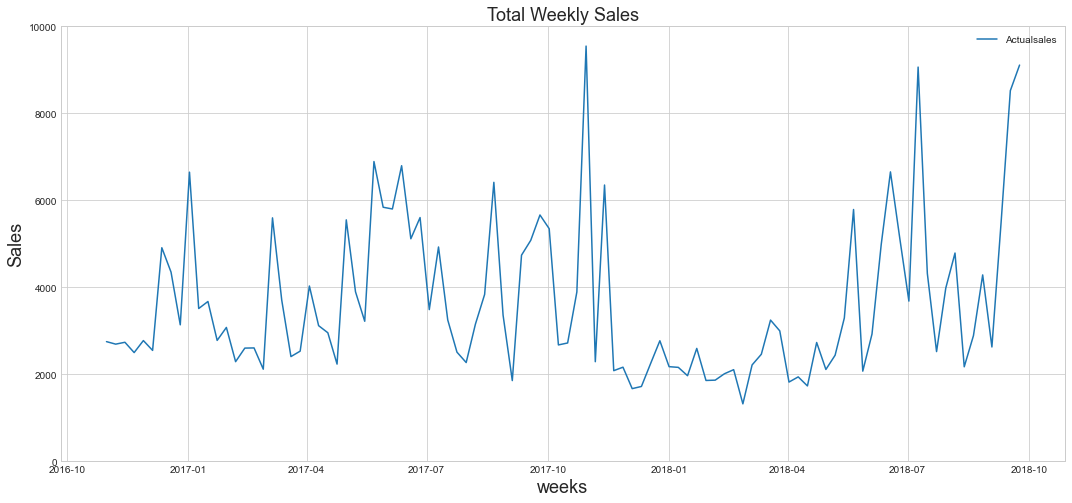

In [211]:
#visual the sales history
fig,ax = plt.subplots(figsize=(18,8))

plt.plot(sale_value_by_week, label="Actualsales");
#plt.xticks(weeks[::7], rotation=45, size=9)
plt.ylim([0,10000])
plt.xlabel('weeks',fontsize = 18)
plt.ylabel('Sales',fontsize = 18)
plt.title("Total Weekly Sales", fontsize = 18);
plt.legend();

## Define R-Square, MAPE, MAE, or MSE
* MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
* MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
* RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
* R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is

In [262]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
#Create a new dataframe wwith only the "wweekly_sale" column
data = df.filter(['weekly_sale'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

In [247]:
sale_value_by_week.head()

week
2016-10-31 00:00:00    2752
2016-11-07 00:00:00    2694
2016-11-14 00:00:00    2737
2016-11-21 00:00:00    2500
2016-11-28 00:00:00    2776
Name: weekly_sales, dtype: object

In [ ]:
"""mae = metrics.mean_absolute_error(y, yhat)
mse = metrics.mean_squared_error(y, yhat)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,yhat)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)"""